In [54]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense
import pandas as pd
import numpy as np

In [55]:
#Importing data
x_train = pd.read_csv('../pre-processamento-e-transformacao/X_TRAIN.csv')
x_test = pd.read_csv('../pre-processamento-e-transformacao/X_TEST.csv')
y_train = pd.read_csv('../pre-processamento-e-transformacao/Y_TRAIN.csv')
y_test = pd.read_csv('../pre-processamento-e-transformacao/Y_TEST.csv')
y_train_log = pd.read_csv('../pre-processamento-e-transformacao/Y_TRAIN_LOG.csv')
y_test_log = pd.read_csv('../pre-processamento-e-transformacao/Y_TEST_LOG.csv')

In [56]:
# Normalizar
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)


In [57]:
# Creating model
input_neuron, hidden_neuron, output_neuron = 283, 3, 1

mlp = Sequential([
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron)
])

In [58]:
# Summary representation
mlp.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 3)                 852       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 856
Trainable params: 856
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compiling model
mlp.compile(optimizer="adam", loss="mse")

In [60]:
# Training the model
batch_size = 16
Log = mlp.fit(x_train, y_train, batch_size=batch_size, epochs=50)

Epoch 1/50
64/64 [==============================] - 0s 648us/step - loss: 38892118016.0000
Epoch 2/50
64/64 [==============================] - 0s 572us/step - loss: 38890434560.0000
Epoch 3/50
64/64 [==============================] - 0s 521us/step - loss: 38888501248.0000
Epoch 4/50
64/64 [==============================] - 0s 587us/step - loss: 38886236160.0000
Epoch 5/50
64/64 [==============================] - 0s 524us/step - loss: 38883651584.0000
Epoch 6/50
64/64 [==============================] - 0s 515us/step - loss: 38880731136.0000
Epoch 7/50
64/64 [==============================] 

## Medidas Desempenho

* **r2_score**(y_test, y_pred)

* **Gráfico de Dispersão**

* **median_absolute_error**(y_test, y_pred)


(0.0, 2000.0)

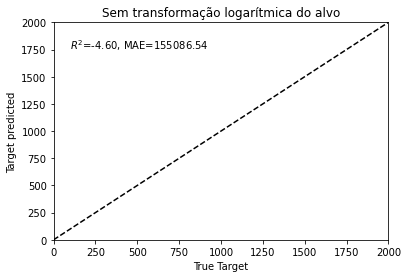

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score

y_pred = mlp.predict(x_test)

r2 = r2_score(y_test, y_pred)

mae = median_absolute_error(y_test, y_pred)

# Plot results
ax0 = plt.axes()

ax0.scatter(y_test, y_pred)
ax0.plot([0, 2000], [0, 2000], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Sem transformação logarítmica do alvo')
ax0.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2, mae))
ax0.set_xlim([0, 2000])
ax0.set_ylim([0, 2000])


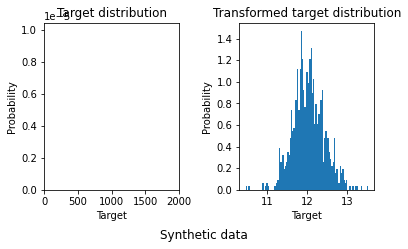

In [62]:
## Y log

f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y_train, bins=100, density=True)
ax0.set_xlim([0, 2000])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_train_log, bins=100, density=True)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Synthetic data", y=0.06, x=0.53)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])


In [63]:
## Predicting with y log

Log = mlp.fit(x_train, y_train_log, batch_size=batch_size, epochs=50)

y_pred = np.expm1(mlp.predict(x_test))

r2 = r2_score(y_test_log, y_pred)

mae = median_absolute_error(y_test_log, y_pred)

# Plot results
ax0 = plt.axes()

ax0.scatter(y_test_log, y_pred)
ax0.plot([0, 2000], [0, 2000], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Sem transformação logarítmica do alvo')
ax0.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2, mae))
ax0.set_xlim([0, 2000])
ax0.set_ylim([0, 2000])

Epoch 1/50
64/64 [==============================] - 0s 844us/step - loss: 1340249.7500
Epoch 2/50
64/64 [==============================] - 0s 1ms/step - loss: 1341693.8750
Epoch 3/50
64/64 [==============================] - 0s 809us/step - loss: 1341066.7500
Epoch 4/50
64/64 [==============================] - 0s 763us/step - loss: 1340418.1250
Epoch 5/50
64/64 [==============================] - 0s 757us/step - loss: 1339746.3750
Epoch 6/50
64/64 [=========================

/tmp/ipykernel_10431/45209565.py:5: RuntimeWarning: overflow encountered in expm1
  y_pred = np.expm1(mlp.predict(x_test))


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').